In [1]:
import numpy as np
import cv2

cap = cv2.VideoCapture("slow_traffic_small.mp4")

feature_params = dict( maxCorners = 100,qualityLevel = 0.3,minDistance = 7,blockSize = 7 )
lk_params = dict(winSize  = (15,15),maxLevel = 2,criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

color = np.random.randint(0,255,(100,3))

ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
mask = np.zeros_like(old_frame)

while(1):
    ret,frame = cap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    good_new = p1[st==1]
    good_old = p0[st==1]

    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
        frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
    img = cv2.add(frame,mask)

    cv2.imshow('frame',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)

cv2.destroyAllWindows()
cap.release()

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [1]:
import cv2

image = cv2.imread("red_panda.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imshow("Gray panda", gray_image)
cv2.imshow("Red panda", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
   
    cv2.imshow("frame", frame)
    
    
    # Frames are read by intervals of 1 millisecond. The 
    # programs breaks out of the while loop when the 
    # user presses the 'q' key 
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
# The following frees up resources and 
# closes all windows 
cap.release() 
cv2.destroyAllWindows() 

In [5]:
import cv2
import numpy as np
image = cv2.imread("red_panda.jpg")
shape = image.shape
blue = (255, 0, 0)
red = (0, 0, 255)
green = (0, 255, 0)
violet = (180, 0, 180)
yellow = (0, 180, 180)
white = (255, 255, 255)

In [6]:
cv2.line(image, (50, 30), (450, 35), blue, thickness=5)
cv2.circle(image, (240, 205), 23, red, -1)
cv2.rectangle(image, (50, 60), (450, 95), green, -1)
cv2.ellipse(image, (250, 150), (80, 20), 5, 0, 360, violet, -1)
points = np.array([[[140, 230], [380, 230], [320, 250], [250, 280]]], np.int32)
cv2.polylines(image, [points], True, yellow, thickness=3)
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(image, "Panda", (20, 180), font, 4, white)

array([[[162, 140, 134],
        [232, 224, 201],
        [255, 255, 242],
        ...,
        [165, 214, 246],
        [174, 224, 244],
        [193, 244, 254]],

       [[222, 205, 192],
        [255, 255, 249],
        [246, 253, 248],
        ...,
        [163, 207, 254],
        [178, 223, 255],
        [195, 240, 255]],

       [[255, 251, 242],
        [248, 255, 255],
        [192, 191, 255],
        ...,
        [160, 198, 255],
        [170, 209, 255],
        [174, 213, 255]],

       ...,

       [[110, 109, 113],
        [110, 109, 113],
        [112, 111, 115],
        ...,
        [ 18,  12,  13],
        [ 17,  11,  12],
        [ 17,  11,  12]],

       [[102, 101, 105],
        [101, 100, 104],
        [100,  99, 103],
        ...,
        [ 16,  10,  11],
        [ 16,  10,  11],
        [ 17,  11,  12]],

       [[ 92,  91,  95],
        [ 90,  89,  93],
        [ 87,  86,  90],
        ...,
        [ 13,   7,   8],
        [ 13,   7,   8],
        [ 14,   8,   9]]

In [7]:
cv2.imshow("red panda", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
image = cv2.imread("flag.png")
rows, cols, ch = image.shape

In [12]:
print(image.shape)

(350, 600, 3)


In [13]:
roi = image[100: 280, 150: 320]

In [14]:
print(image[175, 300])

[  0 255   0]


In [17]:
image[250, 180] = (255, 255, 255)

In [18]:
cv2.imshow("flag", image)
cv2.imshow("Roi", roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
image1 = cv2.imread("car-300x169.jpg")
image2 = cv2.imread("road-300x169.jpg")
sum1 = cv2.add(image1, image2)
weighted = cv2.addWeighted(image1, 0.3, image2, 0.7, 0)
img2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

ret, mask = cv2.threshold(img2_gray, 240, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

road = cv2.bitwise_and(img1, img1, mask=mask)
car = cv2.bitwise_and(img2, img2, mask=mask_inv)
result = cv2.add(road, car)

cv2.imshow("weighted", weighted)
cv2.imshow("sum1", sum1)
cv2.imshow("image1", image1)
cv2.imshow("image2", image2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
img1 = cv2.imread("road-300x169.jpg")
img2 = cv2.imread("car-300x169.jpg")
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

ret, mask = cv2.threshold(img2_gray, 240, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

road = cv2.bitwise_and(img1, img1, mask=mask)
car = cv2.bitwise_and(img2, img2, mask=mask_inv)
result = cv2.add(road, car)

cv2.imshow("img1", img1)
cv2.imshow("img2", img2)
cv2.imshow("mask", mask)
cv2.imshow("mask_inv", mask_inv)
cv2.imshow("road background", road)
cv2.imshow("car no background", car)
cv2.imshow("result", result)
#cv2.imshow("road background", road)
#cv2.imshow("car no background", car)
#cv2.imshow("mask", mask)
#cv2.imshow("mask inverse", mask_inv)
#cv2.imshow("result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
img1 = cv2.imread("drawing_1.png")
img2 = cv2.imread("drawing_2.png")

bit_and = cv2.bitwise_and(img2, img1)
bit_or = cv2.bitwise_or(img2, img1)
bit_xor = cv2.bitwise_xor(img1, img2)
bit_not = cv2.bitwise_not(img1)
bit_not2 = cv2.bitwise_not(img2)

cv2.imshow("img1", img1)
cv2.imshow("img2", img2)

cv2.imshow("bit_and", bit_and)
cv2.imshow("bit_or", bit_or)
cv2.imshow("bit_xor", bit_xor)
cv2.imshow("bit_not", bit_not)
cv2.imshow("bit_not2", bit_not2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:
def nothing(x):
    pass

cap = cv2.VideoCapture(0)

cv2.namedWindow("frame")
cv2.createTrackbar("test", "frame", 50, 500, nothing)
cv2.createTrackbar("color/gray", "frame", 0, 1, nothing)

while True:
    _, frame = cap.read()
    test = cv2.getTrackbarPos("test", "frame")
    font = cv2.FONT_HERSHEY_COMPLEX
    cv2.putText(frame, str(test), (50, 150), font, 4, (0, 0, 255))
    
    s = cv2.getTrackbarPos("color/gray", "frame")
    if s == 0:
        pass
    else:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
# The following frees up resources and 
# closes all windows 
cap.release() 
cv2.destroyAllWindows() 

In [42]:
def nothing(x):
    pass

cap = cv2.VideoCapture(0)
cv2.namedWindow("Trackbars")

cv2.createTrackbar("L – H", "Trackbars", 0, 179, nothing)
cv2.createTrackbar("L – S", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("L – V", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("U – H", "Trackbars", 179, 179, nothing)
cv2.createTrackbar("U – S", "Trackbars", 255, 255, nothing)
cv2.createTrackbar("U – V", "Trackbars", 255, 255, nothing)
while True:
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    l_h = cv2.getTrackbarPos("L – H", "Trackbars")
    l_s = cv2.getTrackbarPos("L – S", "Trackbars")
    l_v = cv2.getTrackbarPos("L – V", "Trackbars")
    u_h = cv2.getTrackbarPos("U – H", "Trackbars")
    u_s = cv2.getTrackbarPos("U – S", "Trackbars")
    u_v = cv2.getTrackbarPos("U – V", "Trackbars")
    
    lower_blue = np.array([l_h, l_s, l_v])
    upper_blue = np.array([u_h, u_s, u_v])
    
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    result = cv2.bitwise_and(frame, frame, mask=mask)
    
    cv2.imshow("frame", frame)
    cv2.imshow("mask", mask)
    cv2.imshow("result", result)
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
# The following frees up resources and 
# closes all windows 
cap.release() 
cv2.destroyAllWindows() 

In [43]:
img = cv2.imread("black_to_white.jpeg", cv2.IMREAD_GRAYSCALE)

_, threshold_binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
_, threshold_binary_inv = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
_, threshold_trunc = cv2.threshold(img, 128, 255, cv2.THRESH_TRUNC)
_, threshold_to_zero = cv2.threshold(img, 12, 255, cv2.THRESH_TOZERO)

In [44]:
cv2.imshow("Image", img)
cv2.imshow("th binary", threshold_binary)
cv2.imshow("th binary inv", threshold_binary_inv)
cv2.imshow("th trunc", threshold_trunc)
cv2.imshow("th to zero", threshold_to_zero)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [45]:
def nothing(x):
    pass

img = cv2.imread("red_panda.jpg", cv2.IMREAD_GRAYSCALE)
cv2.namedWindow("Image")
cv2.createTrackbar("Threshold value", "Image", 128, 255, nothing)

while True:
    value_threshold = cv2.getTrackbarPos("Threshold value", "Image")
    _, threshold_binary = cv2.threshold(img, value_threshold, 255, cv2.THRESH_BINARY)
    _, threshold_binary_inv = cv2.threshold(img, value_threshold, 255, cv2.THRESH_BINARY_INV)
    _, threshold_trunc = cv2.threshold(img, value_threshold, 255, cv2.THRESH_TRUNC)
    _, threshold_to_zero = cv2.threshold(img, value_threshold, 255, cv2.THRESH_TOZERO)
    _, threshold_to_zero_inv = cv2.threshold(img, value_threshold, 255, cv2.THRESH_TOZERO_INV)
    
    cv2.imshow("Image", img)
    cv2.imshow("th binary", threshold_binary)
    cv2.imshow("th binary inv", threshold_binary_inv)
    cv2.imshow("th trunc", threshold_trunc)
    cv2.imshow("th to zero", threshold_to_zero)
    cv2.imshow("th to zero inv", threshold_to_zero_inv)
    
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
# The following frees up resources and 
# closes all windows 
cap.release() 
cv2.destroyAllWindows()     

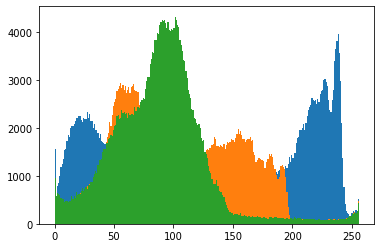

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("sea_beach.jpg")
b, g, r = cv2.split(img)

cv2.imshow("img", img)
cv2.imshow("b", b)
cv2.imshow("g", g)
cv2.imshow("r", r)

plt.hist(b.ravel(), 256, [0, 256])
plt.hist(g.ravel(), 256, [0, 256])
plt.hist(r.ravel(), 256, [0, 256])
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np
img = cv2.imread("red_panda.jpg")
rows, cols, ch = img.shape

print("Height: ", rows)
print("Width: ", cols)

scaled_img = cv2.resize(img, None, fx=1/2, fy=1/2)
print(scaled_img.shape)

Height:  300
Width:  500
(150, 250, 3)


In [2]:
matrix_t = np.float32([[1, 0, -100], [0, 1, -30]])
translated_img = cv2.warpAffine(img, matrix_t, (cols, rows))

matrix_r = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 0.5)
rotated_img = cv2.warpAffine(img, matrix_r, (cols, rows))

cv2.imshow("Original image", img)
cv2.imshow("Scaled image", scaled_img)
cv2.imshow("Translated image", translated_img)
cv2.imshow("Rotated image", rotated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
img = cv2.imread("grid.jpg")
rows, cols, ch = img.shape

cv2.circle(img, (83, 90), 5, (0, 0, 255), -1)
cv2.circle(img, (447, 90), 5, (0, 0, 255), -1)
cv2.circle(img, (83, 472), 5, (0, 0, 255), -1)

pts1 = np.float32([[83, 90], [447, 90], [83, 472]])
pts2 = np.float32([[0, 0], [447, 90], [150, 472]])

matrix = cv2.getAffineTransform(pts1, pts2)
result = cv2.warpAffine(img, matrix, (cols, rows))

cv2.imshow("Image", img)
cv2.imshow("Affine transformation", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
img = cv2.imread("book_page.jpg")

_, threshold = cv2.threshold(img, 155, 255, cv2.THRESH_BINARY)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mean_c = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 12)
gaus = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 91, 12)
cv2.imshow("Img", img)
cv2.imshow("Binary threshold", threshold)
cv2.imshow("Mean C", mean_c)
cv2.imshow("Gaussian", gaus)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
img = cv2.imread("early_1800.jpg")

averaging = cv2.blur(img, (21, 21))
gaussian = cv2.GaussianBlur(img, (21, 21), 3)
median = cv2.medianBlur(img, 5)
bilateral = cv2.bilateralFilter(img, 9, 350, 350)

cv2.imshow("Original image", img)
cv2.imshow("Averaging", averaging)
cv2.imshow("Gaussian", gaussian)
cv2.imshow("Median", median)
cv2.imshow("Bilateral", bilateral)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
img = cv2.imread("balls.jpg", cv2.IMREAD_GRAYSCALE)
_, mask = cv2.threshold(img, 250, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((5, 5), np.uint8)
dilation = cv2.dilate(mask, kernel)
erosion = cv2.erode(mask, kernel, iterations=6)

cv2.imshow("Image", img)
cv2.imshow("Mask", mask)
cv2.imshow("Dilation", dilation)
cv2.imshow("Erosion", erosion)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
img = cv2.imread("white_panda.jpg", cv2.IMREAD_GRAYSCALE)
img = cv2.GaussianBlur(img, (11, 11), 0)

sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1)

laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=5)

canny = cv2.Canny(img, 100, 150)

cv2.imshow("Image", img)
cv2.imshow("Sobelx", sobelx)
cv2.imshow("Sobely", sobely)
cv2.imshow("Laplacian", laplacian)
cv2.imshow("Canny", canny)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred_frame = cv2.GaussianBlur(frame, (5, 5), 0)

    laplacian = cv2.Laplacian(blurred_frame, cv2.CV_64F)
    canny = cv2.Canny(blurred_frame, 100, 150)

    cv2.imshow("Frame", frame)
    cv2.imshow("Laplacian", laplacian)
    cv2.imshow("Canny", canny)

    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
# The following frees up resources and 
# closes all windows 
cap.release() 
cv2.destroyAllWindows()  

In [1]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)
while True:
    _, frame = cap.read()
    blurred_frame = cv2.GaussianBlur(frame, (5, 5), 0)
    hsv = cv2.cvtColor(blurred_frame, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([38, 86, 0])
    upper_blue = np.array([121, 255, 255])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    _, contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    for contour in contours:
        cv2.drawContours(frame, contour, -1, (0, 255, 0), 1)
    cv2.imshow("Frame", frame)
    cv2.imshow("Mask", mask)
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
# The following frees up resources and 
# closes all windows 
cap.release() 
cv2.destroyAllWindows() 

ValueError: not enough values to unpack (expected 3, got 2)

In [3]:
import cv2
import numpy as np
img = cv2.imread("simpsons.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template = cv2.imread("barts_face.jpg", cv2.IMREAD_GRAYSCALE)
w, h = template.shape[::-1]

result = cv2.matchTemplate(gray_img, template, cv2.TM_CCOEFF_NORMED)
loc = np.where(result >= 0.4)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 3)

cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
cap = cv2.VideoCapture(0)
template = cv2.imread("barts_face.jpg", cv2.IMREAD_GRAYSCALE)
w, h = template.shape[::-1]

while True:
    _, frame = cap.read()
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    res = cv2.matchTemplate(gray_frame, template, cv2.TM_CCOEFF_NORMED)
    loc = np.where(res >= 0.7)

    for pt in zip(*loc[::-1]):
        cv2.rectangle(frame, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 3)
    cv2.imshow("Frame", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
# The following frees up resources and 
# closes all windows 
cap.release() 
cv2.destroyAllWindows() 

In [ ]:
import cv2
import numpy as np

img = cv2.imread("lines.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 75, 150)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 75, 150)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50)

In [ ]:
import cv2
import numpy as np
video = cv2.VideoCapture("road_car_view.mp4")
while True:
    ret, orig_frame = video.read()
    if not ret:
        video = cv2.VideoCapture("road_car_view.mp4")
        continue
    frame = cv2.GaussianBlur(orig_frame, (5, 5), 0)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    low_yellow = np.array([18, 94, 140])
    up_yellow = np.array([48, 255, 255])
    mask = cv2.inRange(hsv, low_yellow, up_yellow)
    edges = cv2.Canny(mask, 75, 150)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, maxLineGap=50)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 5)
    cv2.imshow("frame", frame)
    cv2.imshow("edges", edges)
    key = cv2.waitKey(1)
    if key == 27:
        break
video.release()
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture(0)

def nothing(x):
    pass

cv2.namedWindow("Frame")
cv2.createTrackbar("quality", "Frame", 1, 100, nothing)

while True:
    _, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    quality = cv2.getTrackbarPos("quality", "Frame")
    quality = quality / 100 if quality > 0 else 0.01
    corners = cv2.goodFeaturesToTrack(gray, 100, quality, 20)

    if corners is not None:
        corners = np.int0(corners)

        for corner in corners:
            x, y = corner.ravel()
            cv2.circle(frame, (x, y), 3, (0, 0, 255), -1)

    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1)
    if key == 27:
        break
video.release()
cv2.destroyAllWindows()

In [6]:
import cv2

img = cv2.imread("hand.jpg")

# Gaussian Pyramid
layer = img.copy()
gaussian_pyramid = [layer]
for i in range(6):
    layer = cv2.pyrDown(layer)
    gaussian_pyramid.append(layer)

# Laplacian Pyramid
layer = gaussian_pyramid[5]
cv2.imshow("6", layer)
laplacian_pyramid = [layer]
for i in range(5, 0, -1):
    size = (gaussian_pyramid[i-1].shape[1], gaussian_pyramid[i-1].shape[0])
    gaussian_expanded = cv2.pyrUp(gaussian_pyramid[i], dstsize=size)
    laplacian = cv2.subtract(gaussian_pyramid[i-1], gaussian_expanded)
    laplacian_pyramid.append(laplacian)
    cv2.imshow(str(i), laplacian)

reconstructed_image = laplacian_pyramid[0]
for i in range(1, 6):
    size = (laplacian_pyramid[i].shape[1], laplacian_pyramid[i].shape[0])
    reconstructed_image = cv2.pyrUp(reconstructed_image, dstsize=size)
    reconstructed_image = cv2.add(reconstructed_image, laplacian_pyramid[i])
    cv2.imshow(str(i), reconstructed_image)
    
cv2.imshow("Original image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
img1 = cv2.imread("the_book_thief.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("me_holding_book.jpg", cv2.IMREAD_GRAYSCALE)

# ORB Detector
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Brute Force Matching
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)

matching_result = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)

cv2.imshow("Img1", img1)
cv2.imshow("Img2", img2)
cv2.imshow("Matching result", matching_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
def mouse_drawing(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        print("Left click")
        print(x,y)
        circles.append((x, y))

cap = cv2.VideoCapture(0)

cv2.namedWindow("Frame")
cv2.setMouseCallback("Frame", mouse_drawing)

circles = []
while True:
    _, frame = cap.read()

    for center_position in circles:
        cv2.circle(frame, center_position, 5, (0, 0, 255), -1)

    cv2.imshow("Frame", frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
# The following frees up resources and 
# closes all windows 
cap.release() 
cv2.destroyAllWindows() 

Left click
151 186
Left click
2 2
Left click
633 477


In [11]:
import numpy as np
from matplotlib import pyplot as plt

original_image = cv2.imread("goalkeeper.jpg")
hsv_original = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

roi = cv2.imread("pitch_ground.jpg")
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

hue, saturation, value = cv2.split(hsv_roi)

# Histogram ROI
roi_hist = cv2.calcHist([hsv_roi], [0, 1], None, [180, 256], [0, 180, 0, 256])
mask = cv2.calcBackProject([hsv_original], [0, 1], roi_hist, [0, 180, 0, 256], 1)

# Filtering remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask = cv2.filter2D(mask, -1, kernel)
_, mask = cv2.threshold(mask, 100, 255, cv2.THRESH_BINARY)

mask = cv2.merge((mask, mask, mask))
result = cv2.bitwise_and(original_image, mask)

cv2.imshow("Mask", mask)
cv2.imshow("Original image", original_image)
cv2.imshow("Result", result)
cv2.imshow("Roi", roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
video = cv2.VideoCapture("mouthwash.avi")

_, first_frame = video.read()
x = 300
y = 305
width = 100
height = 115
roi = first_frame[y: y + height, x: x + width]
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
roi_hist = cv2.calcHist([hsv_roi], [0], None, [180], [0, 180])
roi_hist = cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

term_criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

cv2.imshow("roi", roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

while True:
    _, frame = video.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask = cv2.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)

    _, track_window = cv2.meanShift(mask, (x, y, width, height), term_criteria)
    x, y, w, h = track_window
    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv2.imshow("Mask", mask)
    cv2.imshow("Frame", frame)q

    if cv2.waitKey(30) & 0xFF == ord('q'): 
        break
# The following frees up resources and 
# closes all windows 
cap.release() 
cv2.destroyAllWindows() 

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
import cv2
import numpy as np

img = cv2.imread("gray_cover.jpg")
roi = img[252: 395, 354: 455]
x = 354
y = 252
width = 455-x
height = 395 -y
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
roi_hist = cv2.calcHist([hsv_roi], [0], None, [180], [0, 180])

cap = cv2.VideoCapture(0)

term_criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

while True:
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask = cv2.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)

    ret, track_window = cv2.CamShift(mask, (x, y, width, height), term_criteria)

    pts = cv2.boxPoints(ret)
    pts = np.int0(pts)
    cv2.polylines(frame, [pts], True, (255, 0, 0), 2)

    cv2.imshow("mask", mask)
    cv2.imshow("Frame", frame)

    key = cv2.waitKey(1)
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [3]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

# Create old frame
_, frame = cap.read()
old_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Lucas kanade params
lk_params = dict(winSize = (15, 15),
maxLevel = 4,
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Mouse function
def select_point(event, x, y, flags, params):
    global point, point_selected, old_points
    if event == cv2.EVENT_LBUTTONDOWN:
        point = (x, y)
        point_selected = True
        old_points = np.array([[x, y]], dtype=np.float32)

cv2.namedWindow("Frame")
cv2.setMouseCallback("Frame", select_point)

point_selected = False
point = ()
old_points = np.array([[]])
while True:
    _, frame = cap.read()
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if point_selected is True:
        cv2.circle(frame, point, 5, (0, 0, 255), 2)

        new_points, status, error = cv2.calcOpticalFlowPyrLK(old_gray, gray_frame, old_points, None, **lk_params)
        old_gray = gray_frame.copy()
        old_points = new_points

        x, y = new_points.ravel()
        cv2.circle(frame, (x, y), 5, (0, 255, 0), -1)

    cv2.imshow("Frame", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
# The following frees up resources and 
# closes all windows 
cap.release() 
cv2.destroyAllWindows() 

In [ ]:
import cv2
import numpy as np
cap = cv2.VideoCapture("highway.mp4")
subtractor = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)
while True:
    _, frame = cap.read()

    mask = subtractor.apply(frame)

    cv2.imshow("Frame", frame)
    cv2.imshow("mask", mask)
    key = cv2.waitKey(30)
    if key == 27:
        break
cap.release()
cv2.destroyAllWindows()

In [5]:
import cv2
import numpy as np

img = cv2.imread("ultimo_sopravvissuto.jpg", cv2.IMREAD_GRAYSCALE)  # queryiamge
cap = cv2.VideoCapture(0)
# Features

sift = cv2.xfeatures2d.SIFT_create()
kp_image, desc_image = sift.detectAndCompute(img, None)
# Feature matching
index_params = dict(algorithm=0, trees=5)
search_params = dict()
flann = cv2.FlannBasedMatcher(index_params, search_params)
while True:
    _, frame = cap.read()
    grayframe = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # trainimage
    kp_grayframe, desc_grayframe = sift.detectAndCompute(grayframe, None)
    matches = flann.knnMatch(desc_image, desc_grayframe, k=2)
    good_points = []
    for m, n in matches:
        if m.distance < 0.6 * n.distance:
            good_points.append(m)
    # img3 = cv2.drawMatches(img, kp_image, grayframe, kp_grayframe, good_points, grayframe)
    # Homography
    if len(good_points) > 10:
        query_pts = np.float32([kp_image[m.queryIdx].pt for m in good_points]).reshape(-1, 1, 2)
        train_pts = np.float32([kp_grayframe[m.trainIdx].pt for m in good_points]).reshape(-1, 1, 2)
        matrix, mask = cv2.findHomography(query_pts, train_pts, cv2.RANSAC, 5.0)
        matches_mask = mask.ravel().tolist()
        # Perspective transform
        h, w = img.shape
        pts = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2)
        dst = cv2.perspectiveTransform(pts, matrix)
        homography = cv2.polylines(frame, [np.int32(dst)], True, (255, 0, 0), 3)
        cv2.imshow("Homography", homography)
    else:
        cv2.imshow("Homography", grayframe)
    # cv2.imshow("Image", img)
    # cv2.imshow("grayFrame", grayframe)
    # cv2.imshow("img3", img3)
    key = cv2.waitKey(1)
    if key == 27:
        break
cap.release()
cv2.destroyAllWindows()

AttributeError: 'cv2.ORB' object has no attribute 'xfeatures2d'

In [2]:
import cv2
import numpy as  np
import glob
import cv2

list_images = glob.iglob("letters/*")

for image_title in list_images:
    img = cv2.imread(image_title, cv2.IMREAD_GRAYSCALE)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    magnitude_spectrum = np.asarray(magnitude_spectrum, dtype=np.uint8)
    img_and_magnitude = np.concatenate((img, magnitude_spectrum), axis=1)

    cv2.imshow(image_title, img_and_magnitude)
    print("d")

cv2.waitKey(0)
cv2.destroyAllWindows()

d
d
d
d
d
d
d
d
d
d
d


In [3]:
import cv2
import numpy as np

digits = cv2.imread("digits.png", cv2.IMREAD_GRAYSCALE)
test_digits = cv2.imread("test_digits.png", cv2.IMREAD_GRAYSCALE)

rows = np.vsplit(digits, 50)
cells = []
for row in rows:
    row_cells = np.hsplit(row, 50)
    for cell in row_cells:
        cell = cell.flatten()
        cells.append(cell)
cells = np.array(cells, dtype=np.float32)
k = np.arange(10)
cells_labels = np.repeat(k, 250)


test_digits = np.vsplit(test_digits, 50)
test_cells = []
for d in test_digits:
    d = d.flatten()
    test_cells.append(d)
test_cells = np.array(test_cells, dtype=np.float32)


# KNN
knn = cv2.ml.KNearest_create()
knn.train(cells, cv2.ml.ROW_SAMPLE, cells_labels)
ret, result, neighbours, dist = knn.findNearest(test_cells, k=3)


print(result)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [0.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [3.]
 [5.]
 [1.]
 [5.]
 [3.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [8.]
 [1.]
 [8.]
 [8.]
 [8.]
 [9.]
 [9.]
 [9.]
 [9.]
 [9.]]


In [ ]:
import cv2
import numpy as np

def nothing(x):
    pass

cap = cv2.VideoCapture(0)

face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

cv2.namedWindow("Frame")
cv2.createTrackbar("Neighbours", "Frame", 5, 20, nothing)

while True:
    _, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    neighbours = cv2.getTrackbarPos("Neighbours", "Frame")

    faces = face_cascade.detectMultiScale(gray, 1.3, neighbours)
    for rect in faces:
        (x, y, w, h) = rect
        frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)


    cv2.imshow("Frame", frame)

    key = cv2.waitKey(1)
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()